# **Izhikevich Simple Neuron Model**

*This model we consider having two variables the normal voltage dv and we add the recovery variable du which all change in respect to time*  
*The values below for a,b,c and d are for excitory and inhiborty neurones bu we will deal with excitory the others will be commented*  
*The values are from Izhikevich paper in 2003*

>$dv/dt = 0.04v^2 + 5v +140 - u + I$  
>$du/dt = a(bv-u)$
> 

In [58]:
import matplotlib.pyplot as plt
# Represents the membrane potential of the neurone
voltage = 0
# the change in time we are dividing a second into a 100 steps
dt = 1.0/100000
# The resting membrane potentiel
v_o = -70
# The time we are going to start the simulation 
t = 0
# The values of the voltage that changes are stored in a list for easy plotting
voltages = []
# Spike times are also counted
spike_times = []
# Threshold value - an abitary value for the voltage when achieved a spike is recorded
thresh = +30
# Membrane recovery variable which is the inactivatiooon of the Na+ ionic currents and the activation of K+.Gives a negative feedback to v
u = 0
# The parametres 
# Theparameter describes the time scale of the recovery variable
a = 0.02
# a = 0.1
# represents the sensitivity of the recovery variable to the subthreshold fluctuation of the membrane
# potential 
b= 0.2
# b=(0.25-0.05)
# C is the after spike reset value for the membrane potential v caused by thr fast high threshold K+ conductance
c=-65
# The after spike reset variable for the variable u caused by slow high-threshold Na+ and K+ conductance
d=8.0
# d=2.0
# Synaptic currents or injected dc currents
I=15




In [59]:
while t < 70:
    voltages.append(voltage)
    # The two equations
    dv = (0.04*voltage**2)+(5*voltage)+140 - u + I
    du = a*((b*voltage)-u)
    
    # Turning on the voltage 
    if t > 30 and t < 40:
        dv += 50
    
    voltage += dv * dt
    u += du * dt
    
    # If the voltage passes the threshold set we update the two
    if voltage >= thresh:
        voltage = c
        u += d
        spike_times.append(t)
    # Add the time with the consecutive steps it take 
    t += dt


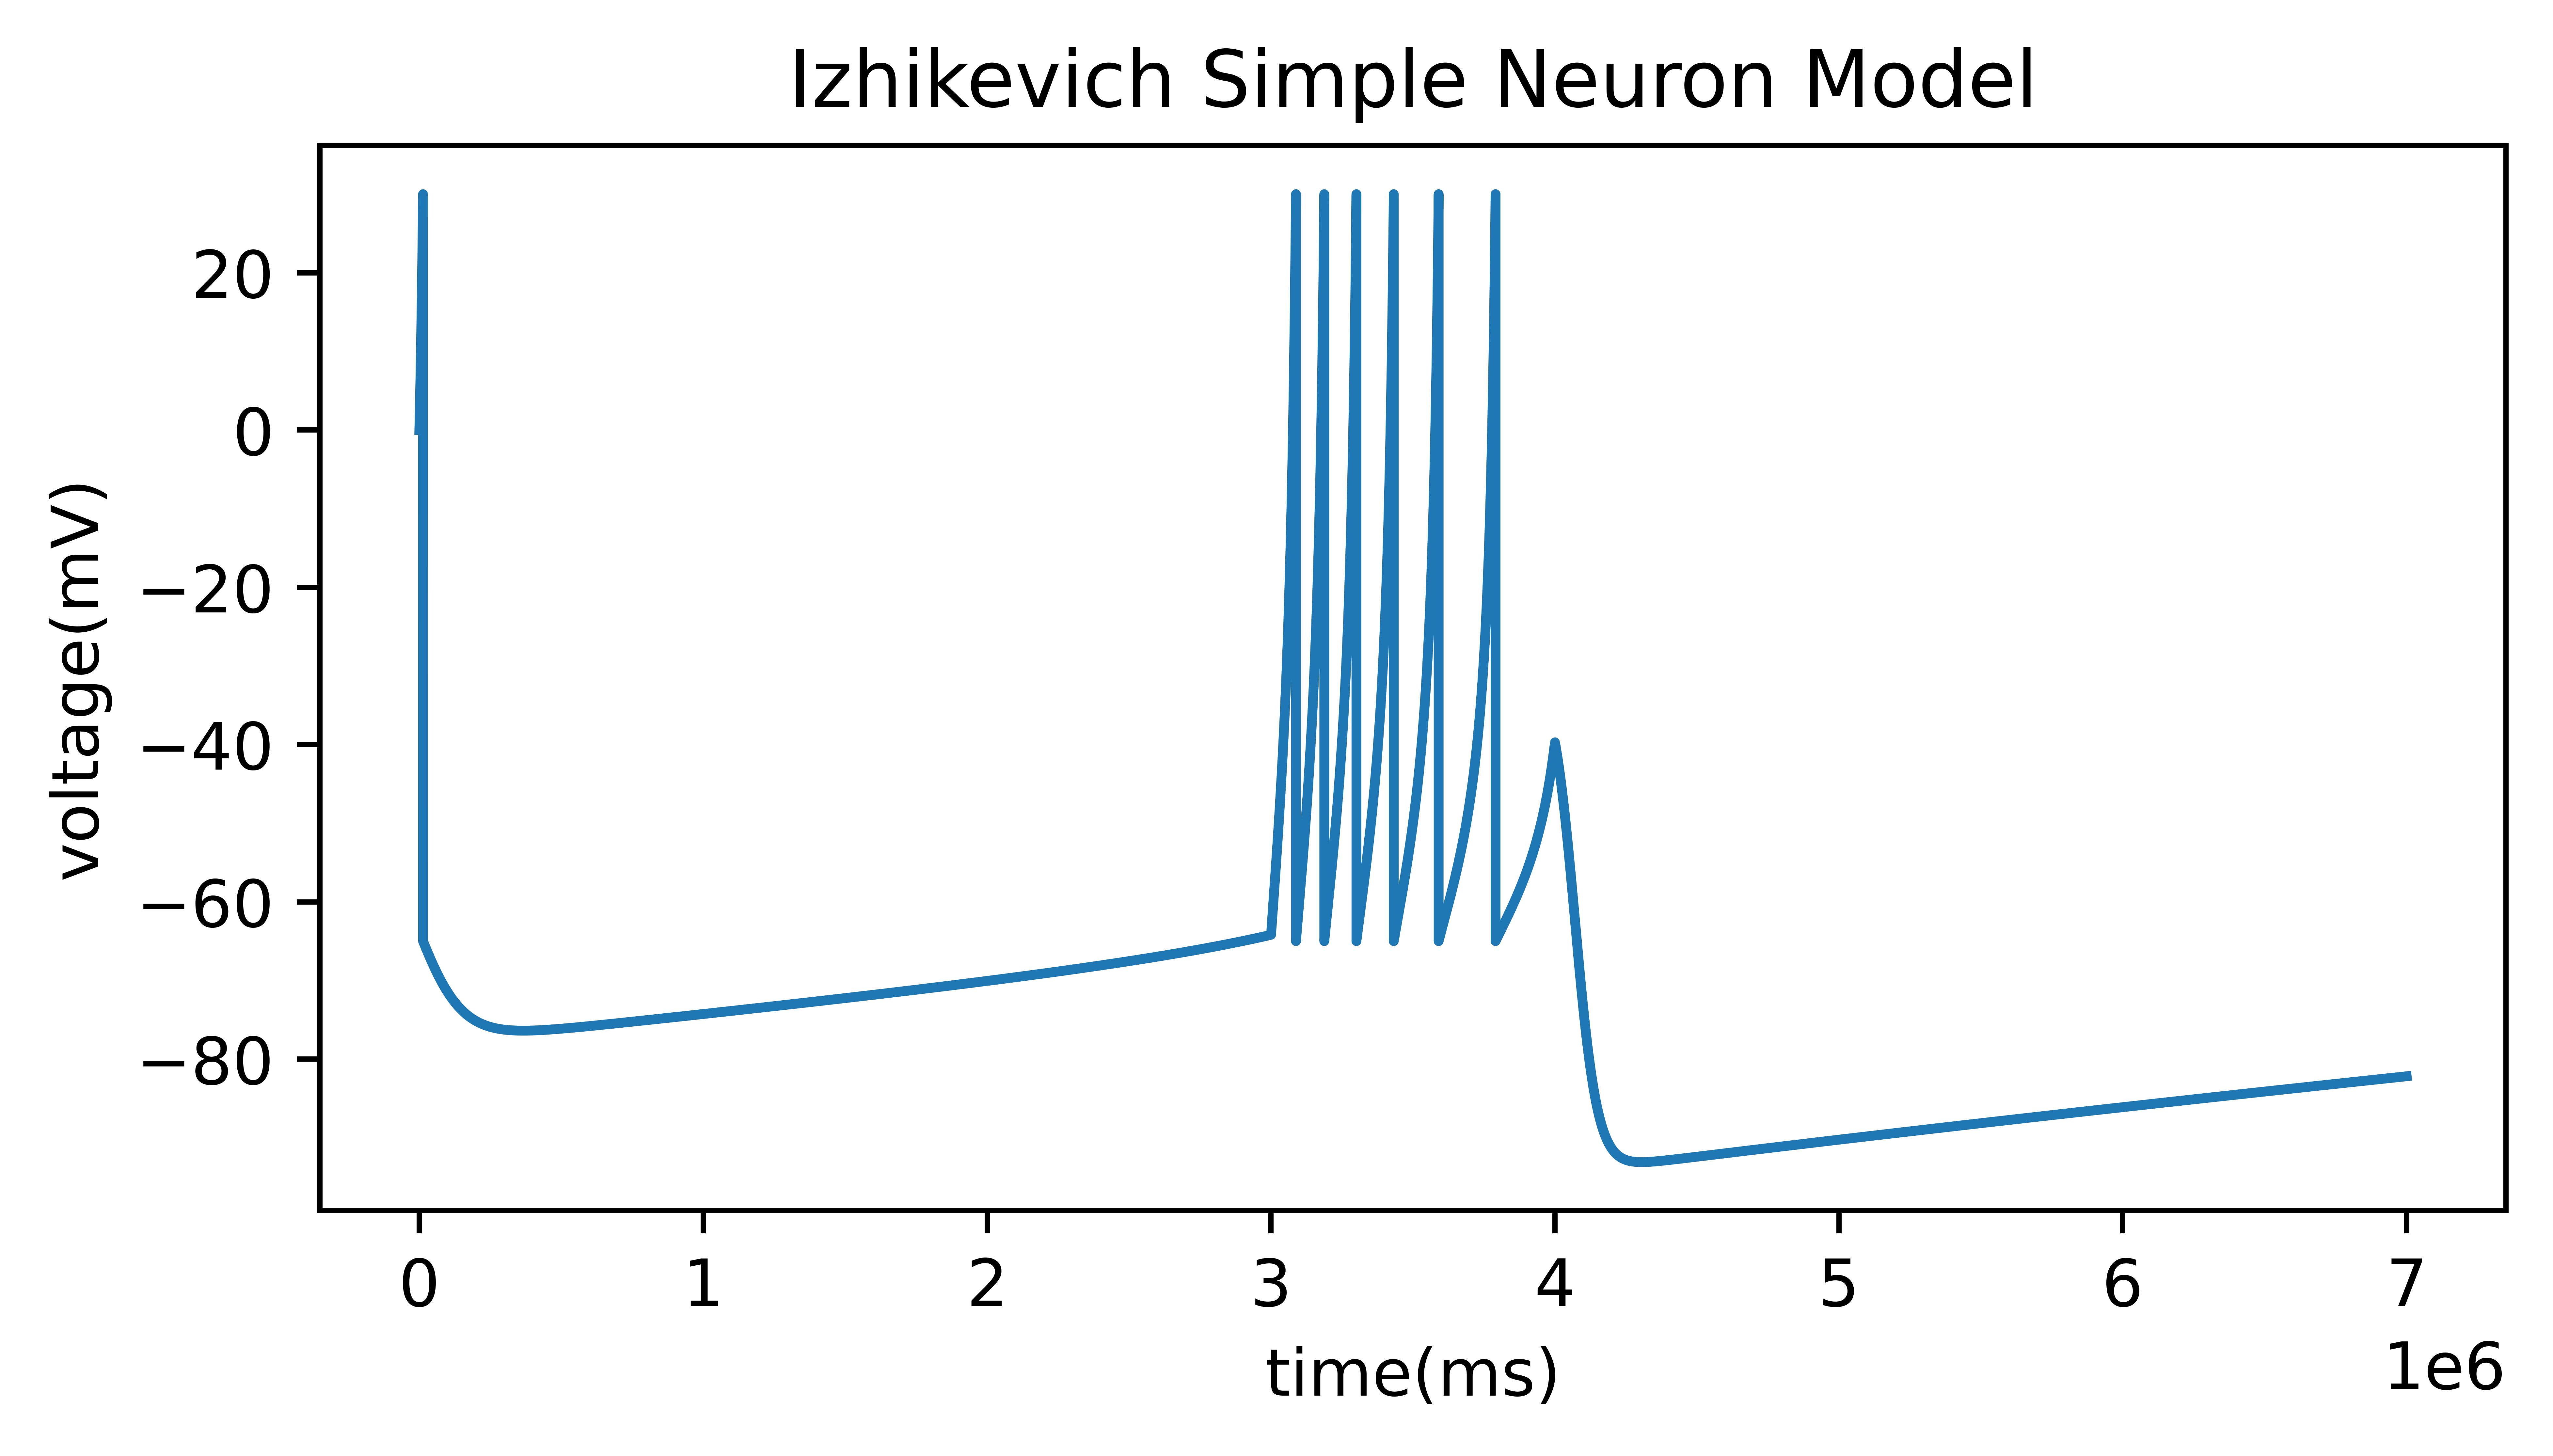

In [60]:
plt.figure(figsize=(6,3),dpi=1440)
plt.plot(voltages)
plt.title('Izhikevich Simple Neuron Model')
plt.ylabel('voltage(mV)')
plt.xlabel('time(ms)')
plt.show()